In [1]:
import unittest
from unittest.mock import patch
from io import StringIO
import time
import matplotlib.pyplot as plt
import sys
import numpy as np

In [2]:
%config Completer.use_jedi = False

In [3]:
%config IPCompleter.greedy=True

# Part I:
## 1) Write a class called myLinkedList that implements the following singly linked list interface:
* add_first:  adding an element at the front

* add_last:  adding an element at the end

* remove_first:  removing a node at the front

* list_traversal:  every node in the list has been seen

In [4]:
class myLinkedList(): # create class myLinkedList
    """Implementation of singly linked list interface"""
    def __init__(self): # constructor
        self.head = None # set head to None as new linked list
        self.tail = None # set tail to None as new linked list
        self.current = None # set current to None as new linked list
        self.size = 0 # set size to zero
        
    @property # use a property to allow getters and setters for attribute size
    def size(self):
        """getter method for attribute size"""
        return self._size # return the weakly private variable _size

    @size.setter # define setter for size
    def size(self, value):
        """setter method for attribute size"""
        if value >= 0: # allow the size to be 0 or larger, do not set values less than 0
            self._size = value
    
    def add_first(self, val): # add method add_first as per question
        """Method to add an element to the start of the linked list with value val passed as arg"""
        element = myLinkedList.myNode(val) # use the myNode helper class defined below
        if self.head == None: # if the head value is None this is the first element to be added then
            self.tail = element # set tail to this element also as first element to be added
        element.next = self.head # set the next pointer for the current element to the current head
        self.head = element # set head to the new element
        self.size += 1 # increase size by 1
        
    def add_last(self, val): # add method add_last as per question
        """Method to add an element to the end of the linked list with value val passed as arg"""
        element = myLinkedList.myNode(val) # create a new node using the myNode helper class below
        element.next = None # as last element set next to None
        if self.tail == None: # if the tail for the list is None then this is the first element then
            self.head = element # set head to current element
        else: # otherwise tail will have a next attribute
            self.tail.next = element # set old tail next to new element
        self.tail = element # set tail to  new element
        self.size += 1 # increase the size by 1
    
    def remove_first(self): # add new method remove_first as per question
        """Method to remove an element from the start of the linked list"""
        if self.head == None: # check that linked list has a first element, if it does not head will be None, then
            raise IndexError("Error linked list is empty") # raise error
        self.head = self.head.get_next() # set head to the next element after head
        self.size -= 1 # reduce size by 1
    
    def list_traversal(self): # define method list_traversal as per question
        """Method to return the value of each element in the linked list"""
        self.current = self.head # set current to the head of the list
        while self.current != None: # loop while the current element is not None
            print(self.current.get_element()) # print element value
            self.current = self.current.get_next() # set current to the next element after current in the list
    
    class myNode(): # helper class myNode, I used this because it was the easiest way I could think of having methods, get_element(), get_next() as well as storing values
        """Helper class for linked list. Creates elements of linked list, has methods get_next pointing to the next element in the list and get_element to return the value in the element, takes argument val which is the value stored in the element of the linked list"""
        def __init__(self, val): # constructor
            self.val = val # set val to arg passed into myNode
            self.next = None # set next to the default of None
            
        def get_next(self): # define get_next getter method
            return self.next # return next
        
        def get_element(self): # define get_element getter method
            return self.val # return val

### Give examples to test the operation of myLinkedList such as adding new elements to the list and removing elements from the list.  Print the content of the list after each operation

In [5]:
# adding elements to the end list examples
l = myLinkedList()
l.add_last(1)
l.add_last(2)
l.add_last(3)
l.add_last(4)
l.add_last(5)
l.list_traversal()

1
2
3
4
5


In [6]:
# adding elements to the start list examples
l = myLinkedList()
l.add_first(1)
l.add_first(2)
l.add_first(3)
l.add_first(4)
l.add_first(5)
l.list_traversal()

5
4
3
2
1


In [7]:
# removing elements from list examples
l = myLinkedList()
l.add_last(1)
l.add_last(2)
l.add_last(3)
l.add_last(4)
l.add_last(5)
l.remove_first()
l.list_traversal()

2
3
4
5


In [8]:
# removing elements from list examples
l = myLinkedList()
l.add_last(1)
l.remove_first()
l.list_traversal()

In [9]:
# removing elements from list examples, raise error
l = myLinkedList()
try:
    l.remove_first()
except IndexError as e:
    print("Caught error:", e)
l.list_traversal()

Caught error: Error linked list is empty


### Unit tests myLinkedList

In [10]:
# these unit tests are based on the code presented in lab 3
# testing standard ouput from https://www.geeksforgeeks.org/python-testing-output-to-stdout/
class TestLinkedList(unittest.TestCase):
    """Unit tests for the myLinkedList class"""
    def test1(self):
        """Test list traversal output works as expected for adding last"""
        l = myLinkedList()
        l.add_last(1)
        l.add_last(2)
        expected_out = "1\n2\n"
        with patch('sys.stdout', new = StringIO()) as fake_out:
            l.list_traversal()
            self.assertEqual(fake_out.getvalue(), expected_out)
            
    def test2(self):
        """Test list traversal output works as expected for adding first"""
        l = myLinkedList()
        l.add_first(1)
        l.add_first(2)
        expected_out = "2\n1\n"
        with patch('sys.stdout', new = StringIO()) as fake_out:
            l.list_traversal()
            self.assertEqual(fake_out.getvalue(), expected_out)
            
    def test3(self):
        """Test list traversal output works as expected for adding first and last"""
        l = myLinkedList()
        l.add_first(1)
        l.add_first(2)
        l.add_last(3)
        l.add_last(4)
        expected_out = "2\n1\n3\n4\n"
        with patch('sys.stdout', new = StringIO()) as fake_out:
            l.list_traversal()
            self.assertEqual(fake_out.getvalue(), expected_out)
            
    def test4(self):
        """Test list traversal output works as expected for more adding"""
        l = myLinkedList()
        l.add_first(1)
        l.add_first(2)
        l.add_first(3)
        l.add_first(4)
        l.remove_first()
        expected_out = "3\n2\n1\n"
        with patch('sys.stdout', new = StringIO()) as fake_out:
            l.list_traversal()
            self.assertEqual(fake_out.getvalue(), expected_out)
        
    def test5(self):
        """Test size attribute works as expected for adding and removing"""
        l = myLinkedList()
        l.add_first(1)
        l.add_first(2)
        l.add_first(3)
        l.add_first(4)
        l.remove_first()
        l.remove_first()
        self.assertEqual(l.size, 2)
        
    def test6(self):
        """Test error rasied when removing too many elements"""
        l = myLinkedList()
        with self.assertRaises(IndexError):
            l.remove_first()
            
    def test7(self):
        """Test size attribute works as expected for adding and removing"""
        l = myLinkedList()
        l.add_first(1)
        l.add_first(2)
        l.remove_first()
        l.remove_first()
        self.assertEqual(l.size, 0)
        
    def test8(self):
        """Test error rasied when removing too many elements"""
        l = myLinkedList()
        l.add_first(1)
        l.add_first(2)
        l.add_first(3)
        l.remove_first()
        l.remove_first()
        l.remove_first()
        with self.assertRaises(IndexError):
            l.remove_first()
        

unittest.main(argv=[''], verbosity=2, exit=False)

test1 (__main__.TestLinkedList)
Test list traversal output works as expected for adding last ... ok
test2 (__main__.TestLinkedList)
Test list traversal output works as expected for adding first ... ok
test3 (__main__.TestLinkedList)
Test list traversal output works as expected for adding first and last ... ok
test4 (__main__.TestLinkedList)
Test list traversal output works as expected for more adding ... ok
test5 (__main__.TestLinkedList)
Test size attribute works as expected for adding and removing ... ok
test6 (__main__.TestLinkedList)
Test error rasied when removing too many elements ... ok
test7 (__main__.TestLinkedList)
Test size attribute works as expected for adding and removing ... ok
test8 (__main__.TestLinkedList)
Test error rasied when removing too many elements ... ok

----------------------------------------------------------------------
Ran 8 tests in 0.007s

OK


NOTE!! for the following implementations I used the linked list implementation as defined earlier. I assumed this was valid from the assignment point "Use arrays OR linked lists to implement the stack/queue ADT". I also implemented this to demonstrate the similarity between linked list and stacks/ queues as well as the utility my implementation of myLinkedList provides.

## 2) Define in your own words the terms:  stack ADT and queue ADT. List the key operations and support operationscommonly associated with these ADTs.  For each ADT, give two real world data examples and explain them briefly.

see the accompanying pdf

# Part II:
## 1) Adopt the ADT concepts of Part I (task 2) to provide acomplete implementation of a stack ADT

In [11]:
class myStack(myLinkedList):
    """Implementation of a stack data structure based on a linked list, extends the superclass myLinkedList to provide functionality such as pop, push etc. for stack"""
    def __init__(self):
        myLinkedList.__init__(self) # call the superclass constructor with self
        
    def push(self, val): # define the push method for stack
        """Method to push value onto the stack, takes paramater val as value that will be added to the stack"""
        self.add_first(val) # call the inherited method add_first with paramater val
        
    def pop(self): # define the pop method for stack
        """Method to pop a value from the stack, returns the value at the top of the stack"""
        top = self.peek() # call the peek method defined below to get the top value
        self.remove_first() # remove the top element in the stack
        return top # return the top value
        
    def is_empty(self): # define the empty method for stack
        """Method to check if the stack is empty"""
        return self.size == 0 # use inherited attribute size from myLinkedList
    
    def peek(self): # define the peek method for stack
        """Method to peek at the top element of the stack without removing it"""
        if self.is_empty(): # check if the stack is empty
            raise IndexError("Stack is empty, no value to return") # return error if empty
        return self.head.get_element() # return the head element value of the linked linked list associated with the stack

### Give examples to test the operation of stack such asadding new elements to the list and removing elements fromthe list. 

In [12]:
# test adding and popping values from the stack
s = myStack()
s.push(1)
s.push(2)
s.push(3)
s.pop()
s.pop()
s.pop()

1

In [13]:
# test adding and popping values from the stack
s = myStack()
s.push(1)
s.push(2)
s.push(3)
s.pop()

3

In [14]:
# test the size of the stack after adding elements
s = myStack()
s.push(1)
s.push(2)
s.push(3)
s.push(100)
s.size

4

In [15]:
# test the is_empty method of the stack after adding elements
s = myStack()
s.push(1)
s.push(2)
s.push(3)
s.push(100)
s.is_empty()

False

In [16]:
# test the is_empty method of the stack with no elements
s = myStack()
s.push(1)
s.push(2)
s.push(3)
s.push(100)
s.pop()
s.pop()
s.pop()
s.pop()
s.is_empty()

True

## 2) What values are returned during the following series of stack operations, if executed upon an initially empty stack S?push(5), push(3), pop(), push(2), push(8), pop(), pop(),push(9), push(1), pop(), push(7), push(6), pop(), pop(),push(4), pop(), and pop()

In [17]:
s = myStack()
s.push(5)
s.push(3)
print(s.pop())
s.push(2)
s.push(8)
print(s.pop())
print(s.pop())
s.push(9)
s.push(1)
print(s.pop())
s.push(7)
s.push(6)
print(s.pop())
print(s.pop())
s.push(4)
print(s.pop())
print(s.pop())

3
8
2
1
6
7
4
9


# 3) Suppose an initially empty stack S has executed a total of 35 push operations, 15 top operations, and 10 pop operations,3 of which raised Empty errors that were caught and ignored.What is the current size of S?

In [18]:
S = myStack()
for i in range(3):
    try:
        S.pop()
    except IndexError as e:
        print("Empty error raised and ignored!")

for i in range(35):
    S.push(i)
    
for i in range(15):
    S.peek()

for i in range(7):
    S.pop()

print("Current size of S is:", S.size)

Empty error raised and ignored!
Empty error raised and ignored!
Empty error raised and ignored!
Current size of S is: 28


## Unit tests stack

In [19]:
# these unit tests are based on the code presented in lab 3
class TestStack(unittest.TestCase):
    """Unit tests for the myStack class"""
    def test1(self):
        """Test push and pop values as expected"""
        S = myStack()
        S.push(1)
        S.push(2)
        self.assertTrue(S.pop() == 2)
        
    def test_2(self):
        """Testing adding different data types to the stack"""
        S = myStack()
        S.push(-1)
        S.push("string")
        S.push(True)
        self.assertTrue(S.pop() == True)
        
    def test3(self):
        """Test push and pop values as expected rigorously"""
        S = myStack()
        S.push(1)
        S.push(2)
        S.push(3)
        S.push(4)
        S.push(5)
        self.assertTrue(S.pop() == 5)
        self.assertTrue(S.pop() == 4)
        self.assertTrue(S.pop() == 3)
        self.assertTrue(S.pop() == 2)
        self.assertTrue(S.pop() == 1)
        
    def test4(self):
        """Test index error raised when popping an empty stack"""
        S = myStack()
        with self.assertRaises(IndexError):
            S.pop()
        
    def test5(self):
        """Test index error raised when peeking an empty stack"""
        S = myStack()
        with self.assertRaises(IndexError):
            S.peek()
            
    def test6(self):
        """Test that size attribute is accurate after pushing values"""
        S = myStack()
        S.push(1)
        S.push(2)
        S.push(3)
        S.push(4)
        S.push(5)
        self.assertTrue(S.size == 5)
        
    def test7(self):
        """Test that size attribute is accurate after pushing and popping values"""
        S = myStack()
        S.push(1)
        S.push(2)
        S.push(3)
        S.push(4)
        S.push(5)
        S.pop()
        S.pop()
        S.pop()
        self.assertTrue(S.size == 2)
        
    def test8(self):
        """Testing peek rigorously"""
        S = myStack()
        S.push(1)
        self.assertTrue(S.peek() == 1)
        S.push(2)
        self.assertTrue(S.peek() == 2)
        S.push(3)
        self.assertTrue(S.peek() == 3)
        S.push(4)
        self.assertTrue(S.peek() == 4)
        S.push(5)
        self.assertTrue(S.peek() == 5)
        
        
unittest.main(argv=[''], verbosity=2, exit=False)

test1 (__main__.TestLinkedList)
Test list traversal output works as expected for adding last ... ok
test2 (__main__.TestLinkedList)
Test list traversal output works as expected for adding first ... ok
test3 (__main__.TestLinkedList)
Test list traversal output works as expected for adding first and last ... ok
test4 (__main__.TestLinkedList)
Test list traversal output works as expected for more adding ... ok
test5 (__main__.TestLinkedList)
Test size attribute works as expected for adding and removing ... ok
test6 (__main__.TestLinkedList)
Test error rasied when removing too many elements ... ok
test7 (__main__.TestLinkedList)
Test size attribute works as expected for adding and removing ... ok
test8 (__main__.TestLinkedList)
Test error rasied when removing too many elements ... ok
test1 (__main__.TestStack)
Test push and pop values as expected ... ok
test3 (__main__.TestStack)
Test push and pop values as expected rigorously ... ok
test4 (__main__.TestStack)
Test index error raised when 

# Part III:

## 1) Adopt the ADT concepts of Part I (task 2) to provide acomplete implementation of a queue ADT

In [20]:
class myQueue(myLinkedList):
    """Implementation of a queue data structure based on a linked list, extends the superclass myLinkedList to provide functionality such as enqueue, dequeue etc. for queue"""
    def __init__(self): # myQueue constructor
        myLinkedList.__init__(self) # call superclass constructor with self
        
    def enqueue(self, val): # define enqueue method
        """Method to enqueue value passed as argument val to queue"""
        self.add_last(val) # use the inherited add_last method from the superclass myLinkedList
        
    def dequeue(self): # define dequeue method
        """Method to dequeue element from the head of the queue, returns value at head"""
        value = self.front() # call the front method defined below to get the front elements value
        self.remove_first() # use the remove_first method from the superclass myLinkedList
        return value # return the value at the front of the list
    
    def is_empty(self): # define empty method explicitly for queue
        """Method to determine if the queue is empty, returns boolean"""
        return self.size == 0 # return boolean based on if the size if 0, size is inherited from superclass
    
    def front(self): # define front method for queue
        """Method to return the value at the front of the list without removing it, raises IndexError when queue empty"""
        if self.is_empty(): # use is_empty method to check if the queue is empty
            raise IndexError("Error queue is empty") # if empty raise error
        return self.head.get_element() # return the head element value

### Give examples to test the operation of queue such as adding new elements to the list and removing elements from the list. 

In [21]:
# test queue enqueue and dequeue as expected
q = myQueue()
q.enqueue(1)
q.enqueue(2)
q.enqueue(3)
q.dequeue()
q.dequeue()
q.dequeue()

3

In [22]:
# Test queue size works as expected
q = myQueue()
q.enqueue(1)
q.enqueue(2)
q.enqueue(3)
q.dequeue()
q.dequeue()
q.dequeue()
q.size

0

In [23]:
# Test queue size works as expected
q = myQueue()
q.enqueue(1)
q.enqueue(2)
q.enqueue(3)
q.dequeue()
q.size

2

In [24]:
# Test queue empty works as expected
q = myQueue()
q.enqueue(1)
q.enqueue(2)
q.enqueue(3)
q.dequeue()
q.is_empty()

False

In [25]:
# Test queue empty works as expected
q = myQueue()
q.enqueue(1)
q.dequeue()
q.is_empty()

True

In [26]:
# Test queue front works as expected
Q = myQueue()
Q.enqueue(1)
Q.enqueue(2)
Q.front()

1

### 2) What values are returned during the following sequence of queue operations, if executed on an initially empty queue Q?enqueue(5), enqueue(3), dequeue(), enqueue(2), enqueue(8),dequeue(), dequeue(), enqueue(9), enqueue(1), dequeue(),enqueue(7), enqueue(6), dequeue(), dequeue(), enqueue(4),dequeue(), dequeue()

In [27]:
q = myQueue()
q.enqueue(5) 
q.enqueue(3) 
print(q.dequeue()) 
q.enqueue(2) 
q.enqueue(8)
print(q.dequeue()) 
print(q.dequeue()) 
q.enqueue(9) 
q.enqueue(1) 
print(q.dequeue())
q.enqueue(7) 
q.enqueue(6) 
print(q.dequeue()) 
print(q.dequeue()) 
q.enqueue(4)
print(q.dequeue()) 
print(q.dequeue())

5
3
2
8
9
1
7
6


### 3) Suppose an initially empty queue Q has executed a total of 50 enqueue operations, 15 top operations, and 15 dequeueoperations, 5 of which raised Empty errors that were caughtand ignored.  What is the current size of Q?

In [28]:
Q = myQueue()

for i in range(5):
    try:
        Q.dequeue()
    except IndexError:
        print("Empty error caught and ignored!")

for i in range(50):
    Q.enqueue(i)
    
for i in range(15):
    Q.front()
    
for i in range(10):
    Q.dequeue()
    
print("Current size of Q is:", Q.size)

Empty error caught and ignored!
Empty error caught and ignored!
Empty error caught and ignored!
Empty error caught and ignored!
Empty error caught and ignored!
Current size of Q is: 40


## Queue unit tests

In [29]:
# these unit tests are based on the code presented in lab 3
class TestQueue(unittest.TestCase):
    """Unit tests for the myQueue class"""
    def test1(self):
        """Test queue enqueue and dequeue operations work as expected"""
        Q = myQueue()
        Q.enqueue(1)
        Q.enqueue(2)
        self.assertTrue(Q.dequeue() == 1)
        
    def test2(self):
        """Test queue enqueue and dequeue operations work as expected more rigorously"""
        Q = myQueue()
        Q.enqueue(-1)
        Q.enqueue("string")
        Q.enqueue(True)
        self.assertTrue(Q.dequeue() == -1)
        
    def test3(self):
        """Test queue enqueue and dequeue operations work very strict"""
        Q = myQueue()
        Q.enqueue(1)
        Q.enqueue(2)
        Q.enqueue(3)
        Q.enqueue(4)
        Q.enqueue(5)
        self.assertTrue(Q.dequeue() == 1)
        self.assertTrue(Q.dequeue() == 2)
        self.assertTrue(Q.dequeue() == 3)
        self.assertTrue(Q.dequeue() == 4)
        self.assertTrue(Q.dequeue() == 5)
        
    def test4(self):
        """Test size attribute works for queue implementation"""
        Q = myQueue()
        Q.enqueue(1)
        Q.enqueue(2)
        Q.enqueue(3)
        Q.enqueue(4)
        Q.enqueue(5)
        self.assertTrue(Q.size == 5)
        
    def test5(self):
        """Test size attribute works with dequeue method"""
        Q = myQueue()
        Q.enqueue(1)
        Q.enqueue(2)
        Q.enqueue(3)
        Q.dequeue()
        Q.dequeue()
        self.assertTrue(Q.size == 1)
        
    def test6(self):
        """Test front method works as expected"""
        Q = myQueue()
        Q.enqueue(1)
        self.assertTrue(Q.front() == 1)
        Q.enqueue(2)
        self.assertTrue(Q.front() == 1)
        Q.enqueue(3)
        self.assertTrue(Q.front() == 1)
        Q.dequeue()
        self.assertTrue(Q.front() == 2)
        
    def test7(self):
        """Test index error raised when using front an empty queue"""
        Q = myQueue()
        with self.assertRaises(IndexError):
            Q.front()
            
            
    def test8(self):
        """Test index error raised when using dequeue an empty queue"""
        Q = myQueue()
        with self.assertRaises(IndexError):
            Q.dequeue()

unittest.main(argv=[''], verbosity=2, exit=False)

test1 (__main__.TestLinkedList)
Test list traversal output works as expected for adding last ... ok
test2 (__main__.TestLinkedList)
Test list traversal output works as expected for adding first ... ok
test3 (__main__.TestLinkedList)
Test list traversal output works as expected for adding first and last ... ok
test4 (__main__.TestLinkedList)
Test list traversal output works as expected for more adding ... ok
test5 (__main__.TestLinkedList)
Test size attribute works as expected for adding and removing ... ok
test6 (__main__.TestLinkedList)
Test error rasied when removing too many elements ... ok
test7 (__main__.TestLinkedList)
Test size attribute works as expected for adding and removing ... ok
test8 (__main__.TestLinkedList)
Test error rasied when removing too many elements ... ok
test1 (__main__.TestQueue)
Test queue enqueue and dequeue operations work as expected ... ok
test2 (__main__.TestQueue)
Test queue enqueue and dequeue operations work as expected more rigorously ... ok
test3 (

# Creativity


In [35]:
LL = myLinkedList()
Q = myQueue()
S = myStack()
L = list()


LLtime = []
Qtime = []
Stime = []
Ltime = []

LLsize = []
Qsize = []
Ssize = []
Lsize = []

LLdtime = []
Qdtime = []
Sdtime = []
Ldtime = []


def add_time(func, val): # function to determine the amount of time taken to add a element to the data structure
    start_time = time.perf_counter()
    func(val)
    end = time.perf_counter()
    return end - start_time

def find_size(struc): # function to get the size of the linked list, stack and queue data structures
    element = struc.head
    total = 0
    while element != None:
        total += sys.getsizeof(element)
        element = element.get_next()
    return total

def remove_time(func): # function to determine the amount of time taken to remove an element from a data structure
    start_time = time.perf_counter()
    func()
    end = time.perf_counter()
    return end - start_time

for i in range(1000): # for i in range 0 to 1000
    LLtime.append(add_time(LL.add_first, i)) # get time to add to linked list and add it to LLtime list
    Qtime.append(add_time(Q.enqueue,i))
    Stime.append(add_time(S.push, i))
    Ltime.append(add_time(L.append, i))
    LLsize.append(find_size(LL)) # find size of linked list using above function
    Qsize.append(find_size(Q))
    Ssize.append(find_size(S))
    Lsize.append(sys.getsizeof(L))
    
for i in range(1000):
    LLdtime.append(remove_time(LL.remove_first)) # find time taken to remove element from linked list
    Qdtime.append(remove_time(Q.dequeue))
    Sdtime.append(remove_time(S.pop))
    Ldtime.append(remove_time(L.pop))

Text(0, 0.5, 'Time to input value')

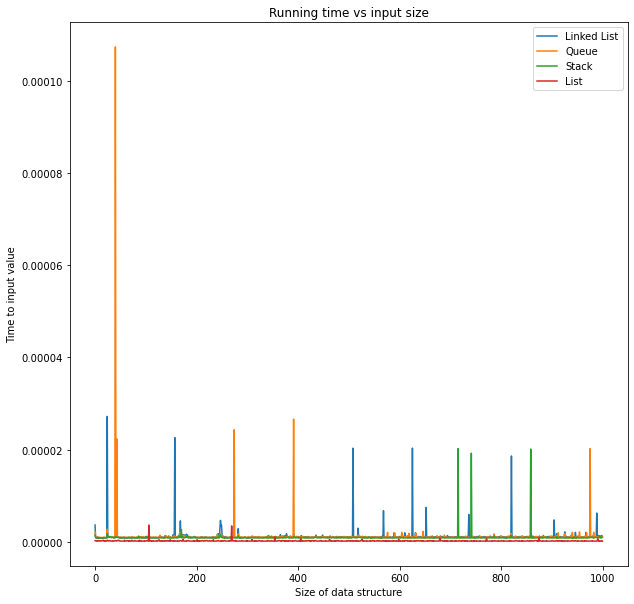

In [36]:
plt.figure(figsize=(10,10))
plt.plot(LLtime, label="Linked List")
plt.plot(Qtime, label="Queue")
plt.plot(Stime, label="Stack")
plt.plot(Ltime, label="List")
plt.legend()
plt.title("Running time vs input size")
plt.xlabel("Size of data structure")
plt.ylabel("Time to input value")
#plt.savefig("running_time_input.png")

In [37]:
LLdtime.reverse() # reverse the list as we removed from a list of 1000 first then 999, then 998... for plotting makes easier
Qdtime.reverse()
Sdtime.reverse()
Ldtime.reverse()

Text(0, 0.5, 'Time to remove value')

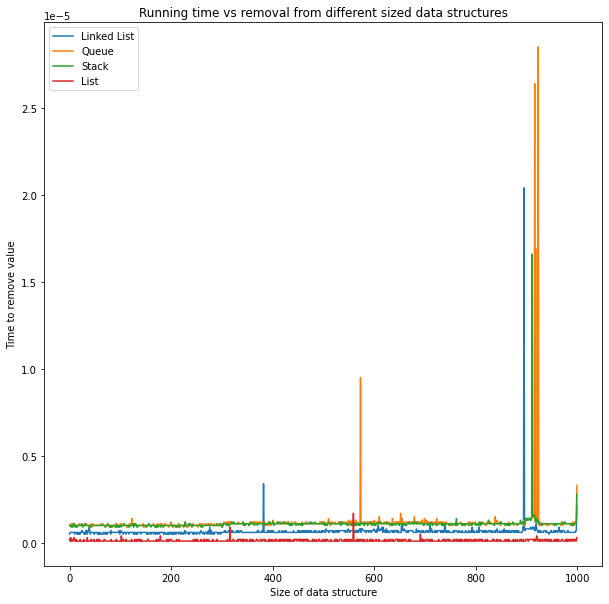

In [38]:
x = np.linspace(100000, 0, 100000)
plt.figure(figsize=(10,10))
plt.plot(LLdtime, label="Linked List")
plt.plot(Qdtime, label="Queue")
plt.plot(Sdtime, label="Stack")
plt.plot(Ldtime, label="List")
plt.legend()
plt.title("Running time vs removal from different sized data structures")
plt.xlabel("Size of data structure")
plt.ylabel("Time to remove value")
#plt.savefig("running_time_removal.png")

Text(0, 0.5, 'Memory size bytes')

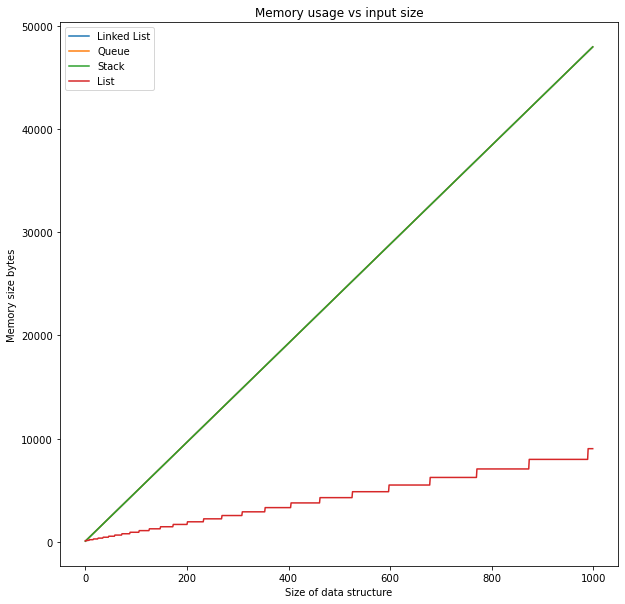

In [39]:
plt.figure(figsize=(10,10))
plt.plot(LLsize, label="Linked List")
plt.plot(Qsize, label="Queue")
plt.plot(Ssize, label="Stack")
plt.plot(Lsize, label="List")
plt.legend()
plt.title("Memory usage vs input size")
plt.xlabel("Size of data structure")
plt.ylabel("Memory size bytes")
#plt.savefig("memory_usage.png")